# PostgreSQL and Pandas

### Histogram to visualize the most common salary ranges for employees.

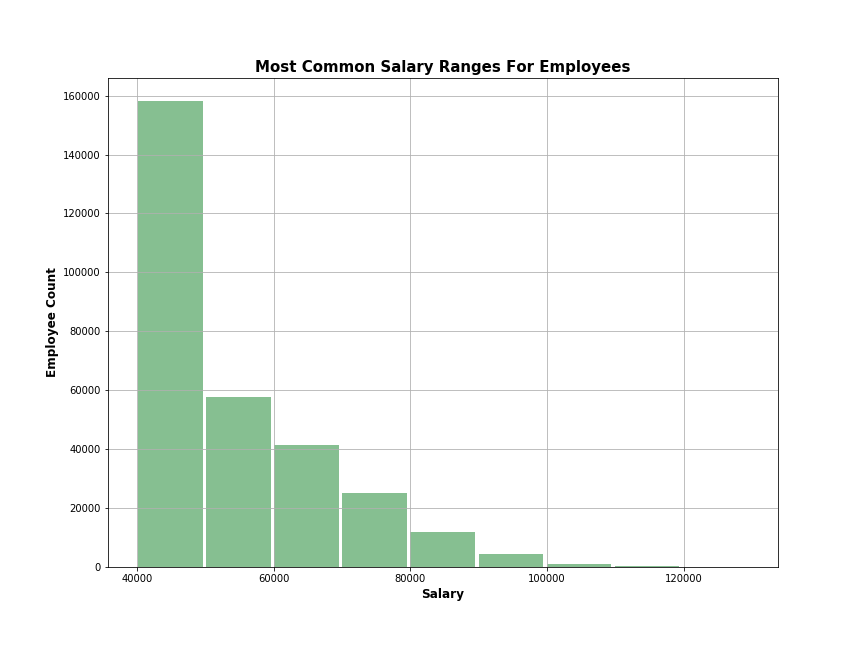

### Bar Chart of Average Salary By Title

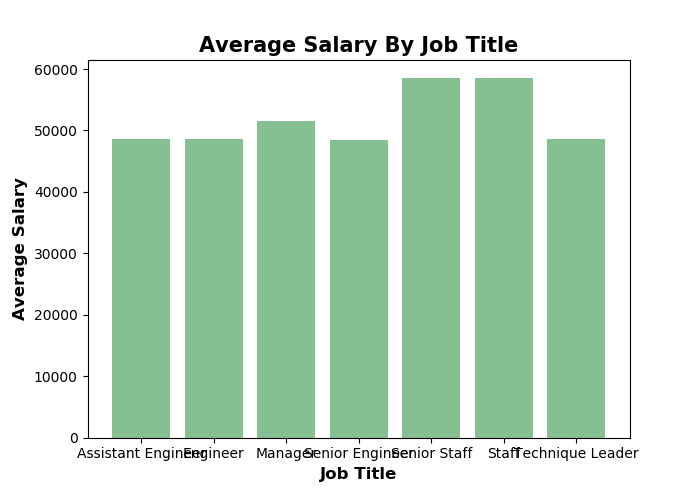

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import os

In [2]:
#File paths
file_path=os.path.join("","Charts/")

In [3]:
#Environment Varibale:  Postgres db host,ID,password and db name info is stored as environment variables.
#Environment variables are loaded as a part of Jupyter session 

In [4]:
#DB Connect function 
def dbConnection(db_host,db_name,db_user,db_password):
    
    try:
        conn= psycopg2.connect(host=db_host,database=db_name, user=db_user, password=db_password)
        return conn 
    except:
        print("DB Connection could not be established. Please check DB settings including URL, ID and Password.")
        print("Please do not excute subsequent code as it is dependent on database connectivity.")
    else:
        print("DB Connection was successfully established")

In [5]:
#Establish DB connection - All parameters are available as environment variables
conn = dbConnection(db_host,db_name,db_user,db_password)

### Create a histogram to visualize the most common salary ranges for employees.

In [6]:
#Get the Salary 
try:
    salary_df = pd.read_sql_query('select * from "Salary" order by salary;', conn)
except:
    print("Failed to get database result for Salary table.")

In [7]:
#Dispaly sample data
salary_df.head(5)

,emp_no,salary
0,42589,"$40,000.00"
1,68253,"$40,000.00"
2,44127,"$40,000.00"
3,26876,"$40,000.00"
4,44124,"$40,000.00"


In [8]:
#Let's clear format of salary column 
salary_df["salary"]=salary_df["salary"].str.replace("$","").str.replace(",","").astype(float)

In [9]:
#let's determin bin size (@salary increment of 10K )
maximumvalue =salary_df.salary.max()
minimumvalue= salary_df.salary.min()
numberofbins = ( (maximumvalue - minimumvalue) / 10000 )
numberofbins

8.9492

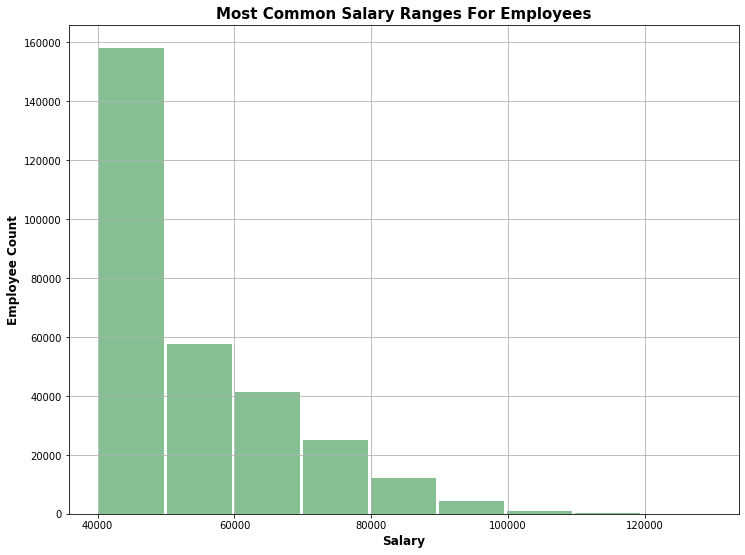

In [10]:
#Plot histogram
ax = salary_df.hist(column='salary', bins=9, grid=True, figsize=(12,9), color='#86bf91', zorder=1, rwidth=0.95)
plt.xlabel("Salary", weight='bold', size=12)
plt.ylabel("Employee Count", weight='bold', size=12)
plt.title("Most Common Salary Ranges For Employees", weight='bold', size=15)

#Save plot file
plt.savefig(file_path +"commonsalaryRange.png")

### Create a bar chart of average salary by title.

In [11]:
#Get Title salary
try:
    title_salary = pd.read_sql_query('SELECT salary,title FROM "Salary" s,"Employee" e,"Title" t \
                        WHERE s.emp_no=e.emp_no AND \
                        e.emp_title_id =t.title_id ORDER BY s.salary ASC;', conn)
except:
    print("Failed to get database result for Salary by Title query.")

In [12]:
#Display sample data
title_salary.head()

,salary,title
0,"$40,000.00",Senior Engineer
1,"$40,000.00",Senior Engineer
2,"$40,000.00",Senior Engineer
3,"$40,000.00",Engineer
4,"$40,000.00",Senior Engineer


In [13]:
#Remove Salary format for pandas group by
title_salary["salary"]=title_salary["salary"].str.replace("$","").str.replace(",","").astype(float)

In [14]:
#Display sample data
title_salary.head()

,salary,title
0,40000.0,Senior Engineer
1,40000.0,Senior Engineer
2,40000.0,Senior Engineer
3,40000.0,Engineer
4,40000.0,Senior Engineer


In [15]:
#Get average salary for job title
title_salary= title_salary.groupby(["title"]).mean()

#Reset index
title_salary =title_salary.reset_index()

In [16]:
#Display sample records
title_salary.head()

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704


[Text(0, 0, 'Assistant Engineer'),
 Text(1, 0, 'Engineer'),
 Text(2, 0, 'Manager'),
 Text(3, 0, 'Senior Engineer'),
 Text(4, 0, 'Senior Staff'),
 Text(5, 0, 'Staff'),
 Text(6, 0, 'Technique Leader')]

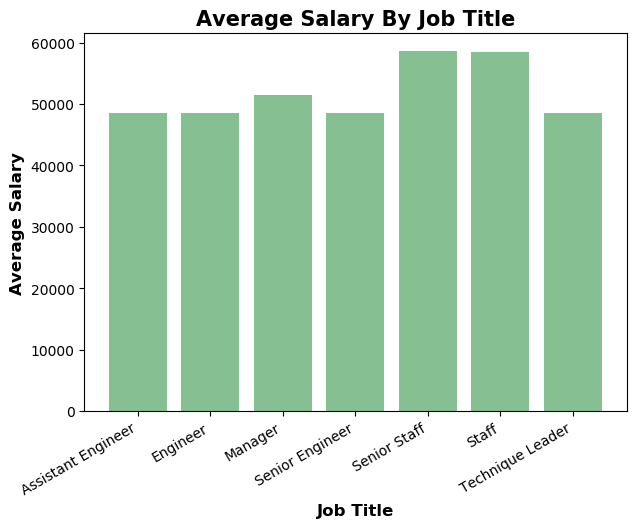

In [17]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,5), dpi=100)

#Get x and y axis
x_axis = title_salary.title
y_axis= title_salary.salary

#Set the plot with x and y axis
plt.bar(x_axis,y_axis,color="#86bf91")

#Set graph legend
plt.xlabel("Job Title", weight='bold', size=12)
plt.ylabel("Average Salary", weight='bold', size=12)
plt.title("Average Salary By Job Title", weight='bold', size=15)
plt.draw()

#Save plot file
plt.savefig(file_path +"salaryTitle.png")

#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

In [18]:
#Close DB connection
try:
    conn.close()
except:
    print("Database connection is aborted or not active")
else:
    print("Database Connection closed successfully!")

Database Connection closed successfully!
